### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
app_df = application_df.drop(columns=['EIN','NAME'])
app_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
app_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = app_df["APPLICATION_TYPE"].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

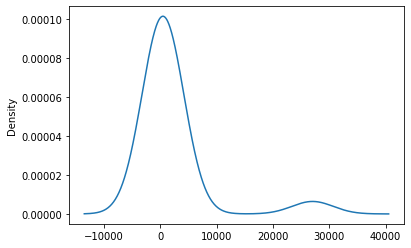

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than 156
replace_application = list(app_counts[app_counts < 156].index)
replace_application

['T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [7]:
# Replace in dataframe
for app in replace_application:
    app_df.APPLICATION_TYPE = app_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
app_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = app_df["CLASSIFICATION"].value_counts()
classification_counts.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

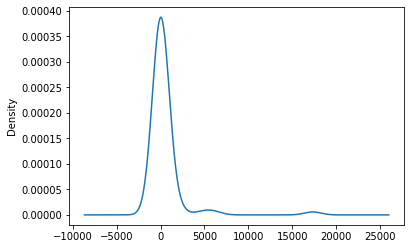

In [9]:
# Visualize the value counts of CLASSIFICATION
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html
classification_counts.plot.density()

In [10]:
replace_class = list(classification_counts[classification_counts < 1883].index)

In [11]:
# Replace in dataframe
for cls in replace_class:
    app_df.CLASSIFICATION = app_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
app_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
categorical_vars = app_df.dtypes[app_df.dtypes == "object"].index.to_list()

In [13]:
categorical_vars

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(app_df[categorical_vars]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(categorical_vars)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
app_df = app_df.merge(encode_df, left_index=True, right_index=True)
app_df = app_df.drop(labels=categorical_vars, axis=1)  # drop columns of categorical variables
app_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = app_df["IS_SUCCESSFUL"].values
X = app_df.drop(labels = ["IS_SUCCESSFUL"], axis=1).values 

# Split the preprocessed data into a training and testing dataset
# Use default split of 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)  

In [17]:
# print('X_train shape:', X_train.shape)
# print('X_test shape:', X_test.shape)
# print('y_train shape:', y_train.shape)
# print('y_test shape:', y_test.shape)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [19]:
len(X_train[0])

44

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train[0])  # num of independent variables
num_nodes_layer1 = 10
num_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=num_nodes_layer1, input_dim=num_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=num_nodes_layer2, activation = 'relu'))

# Output layer; try sigmoid since have binary output
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint filepath and filename
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_filepath = "checkpoints/weights.{epoch:02d}.hdf5"

In [22]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

# Create a callback to save model weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_filepath, verbose=1, save_weights_only=True, save_freq=5)

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=60, callbacks=[cp_callback])

Epoch 1/60
  1/804 [..............................] - ETA: 10:52 - loss: 0.6471 - accuracy: 0.7812
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6820 - accuracy: 0.6136   
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 21/804 [..............................] - ETA: 5s - loss: 0.6733 - accuracy: 0.6027
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 31/804 [>.............................] - ETA: 5s - loss: 0.6663 - accuracy: 0.6079
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 41/804 [>.............................] - ETA: 5s - loss: 0.6648 - accuracy: 0.6143
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints

406/804 [==============>...............] - ETA: 2s - loss: 0.6088 - accuracy: 0.6869
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.6078 - accuracy: 0.6879
Epoch 00001: saving model to checkpoints\weights.01.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 0.6076 - accuracy: 0.6881
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.6072 - accuracy: 0.6885
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.6069 - accuracy: 0.6888
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
451/804 [===============>..............] - ETA: 2s - loss:

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.5567 - accuracy: 0.7396
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 22/804 [..............................] - ETA: 4s - loss: 0.5852 - accuracy: 0.7031
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 32/804 [>.............................] - ETA: 4s - loss: 0.5879 - accuracy: 0.6973
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 42/804 [>.............................] - ETA: 4s - loss: 0.5895 - accuracy: 0.7001
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 52/804 [>.............................] - ETA: 4s - loss: 0.5871 - accuracy: 0.7067
Epoch 00002: saving model to checkpoints\weights.02.hdf5



417/804 [==============>...............] - ETA: 2s - loss: 0.5669 - accuracy: 0.7244
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.5678 - accuracy: 0.7237
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.5684 - accuracy: 0.7229
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.5681 - accuracy: 0.7228
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.5683 - accuracy: 0.7225
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5


 23/804 [..............................] - ETA: 4s - loss: 0.5554 - accuracy: 0.7215
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 33/804 [>.............................] - ETA: 4s - loss: 0.5619 - accuracy: 0.7150
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 43/804 [>.............................] - ETA: 4s - loss: 0.5583 - accuracy: 0.7173
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 53/804 [>.............................] - ETA: 4s - loss: 0.5584 - accuracy: 0.7176
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 63/804 [=>............................] - ETA: 4s - loss: 0.5626 - accuracy: 0.7143
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5


446/804 [===============>..............] - ETA: 1s - loss: 0.5556 - accuracy: 0.7260
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5564 - accuracy: 0.7253
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.5560 - accuracy: 0.7256
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.5558 - accuracy: 0.7260
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.5564 - accuracy: 0.7255
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5


 53/804 [>.............................] - ETA: 3s - loss: 0.5578 - accuracy: 0.7300
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 0.5506 - accuracy: 0.7344
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 0.5508 - accuracy: 0.7373
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 84/804 [==>...........................] - ETA: 3s - loss: 0.5621 - accuracy: 0.7310
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 94/804 [==>...........................] - ETA: 3s - loss: 0.5642 - accuracy: 0.7281
Epoch 00004: saving model to checkpoints\weights.04.hdf5



Epoch 00004: saving model to checkpoints\weights.04.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5555 - accuracy: 0.7282
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.5553 - accuracy: 0.7279
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5550 - accuracy: 0.7280
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.5538 - accuracy: 0.7290
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.5549 - accuracy: 0.7280
Epoch 00004: saving model to checkpoints\weights.04.hdf5


 72/804 [=>............................] - ETA: 3s - loss: 0.5551 - accuracy: 0.7257
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 0.5524 - accuracy: 0.7285
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.5519 - accuracy: 0.7302
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.5528 - accuracy: 0.7294
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.5533 - accuracy: 0.7284
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5


485/804 [=================>............] - ETA: 1s - loss: 0.5512 - accuracy: 0.7290
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5511 - accuracy: 0.7293
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5511 - accuracy: 0.7293
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5514 - accuracy: 0.7291
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.5518 - accuracy: 0.7286

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.5458 - accuracy: 0.7351
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.5407 - accuracy: 0.7403
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.5464 - accuracy: 0.7351
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
146/804 [====>.........................] - ETA: 3s - loss: 0.5481 - accuracy: 0.7322
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
156/804 [====>.............

526/804 [==================>...........] - ETA: 1s - loss: 0.5529 - accuracy: 0.7288
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.5537 - accuracy: 0.7280
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.5540 - accuracy: 0.7273
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.5536 - accuracy: 0.7275
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.5537 - accuracy: 0.7273
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5


127/804 [===>..........................] - ETA: 3s - loss: 0.5532 - accuracy: 0.7296
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
137/804 [====>.........................] - ETA: 3s - loss: 0.5549 - accuracy: 0.7272
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.5529 - accuracy: 0.7292
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.5530 - accuracy: 0.7301
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.5544 - accuracy: 0.7289
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5


537/804 [===================>..........] - ETA: 1s - loss: 0.5478 - accuracy: 0.7318
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.5491 - accuracy: 0.7309
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.5488 - accuracy: 0.7310
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.5508 - accuracy: 0.7293
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.5501 - accuracy: 0.7297
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5


Epoch 00008: saving model to checkpoints\weights.08.hdf5
143/804 [====>.........................] - ETA: 3s - loss: 0.5410 - accuracy: 0.7384
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7379
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
163/804 [=====>........................] - ETA: 3s - loss: 0.5404 - accuracy: 0.7385
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.5409 - accuracy: 0.7386
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.5407 - accuracy: 0.7389
Epoch 00008: saving model to checkpoints\weights.08.hdf5



Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.5486 - accuracy: 0.7290
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.5481 - accuracy: 0.7291
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.5489 - accuracy: 0.7283
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.5486 - accuracy: 0.7280
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
598/804 [==================

152/804 [====>.........................] - ETA: 3s - loss: 0.5436 - accuracy: 0.7381
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
164/804 [=====>........................] - ETA: 3s - loss: 0.5492 - accuracy: 0.7319
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.5482 - accuracy: 0.7328
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.5480 - accuracy: 0.7325
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.5462 - accuracy: 0.7345
Epoch 00009: saving model to checkpoints\weights.09.hdf5


555/804 [===================>..........] - ETA: 1s - loss: 0.5465 - accuracy: 0.7308
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.5470 - accuracy: 0.7308
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5477 - accuracy: 0.7299
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.5476 - accuracy: 0.7299
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.5475 - accuracy: 0.7302
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5


160/804 [====>.........................] - ETA: 3s - loss: 0.5440 - accuracy: 0.7328
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.5441 - accuracy: 0.7334
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.5468 - accuracy: 0.7309
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.5467 - accuracy: 0.7301
Epoch 00010: saving model to checkpoints\weights.10.hdf5
197/804 [======>.......................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7294
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
205/804 [======>.......................] - ETA: 3s - loss:

563/804 [====================>.........] - ETA: 1s - loss: 0.5478 - accuracy: 0.7295
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.5482 - accuracy: 0.7293
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.5478 - accuracy: 0.7296
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.5482 - accuracy: 0.7296
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.5488 - accuracy: 0.7291
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5


161/804 [=====>........................] - ETA: 3s - loss: 0.5410 - accuracy: 0.7327
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.5424 - accuracy: 0.7325
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.5418 - accuracy: 0.7326
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.5414 - accuracy: 0.7320
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
206/804 [======>.......................] - ETA: 3s - loss: 0.5425 - accuracy: 0.7307
Epoch 00011: saving model to checkpoints\weights.11.hdf5


Epoch 00011: saving model to checkpoints\weights.11.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.5498 - accuracy: 0.7287
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.5491 - accuracy: 0.7291
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.5490 - accuracy: 0.7293
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5483 - accuracy: 0.7300
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5484 - accuracy: 0.7297
Epoch 00011: saving model to checkpoints\weights.11.hdf5



Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
192/804 [======>.......................] - ETA: 3s - loss: 0.5516 - accuracy: 0.7288
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
202/804 [======>.......................] - ETA: 3s - loss: 0.5493 - accuracy: 0.7307
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
212/804 [======>.......................] - ETA: 3s - loss: 0.5480 - accuracy: 0.7313
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
222/804 [=======>......................] - ETA: 3s - loss: 0.5476 - accuracy: 0.7320
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
232/804 [=======>......................] - ETA: 3s - loss: 0.5478 - accuracy: 0.7309


597/804 [=====================>........] - ETA: 1s - loss: 0.5505 - accuracy: 0.7290
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.5500 - accuracy: 0.7293
Epoch 00012: saving model to checkpoints\weights.12.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.5503 - accuracy: 0.7293
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5499 - accuracy: 0.7295
Epoch 00012: saving model to checkpoints\weights.12.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5500 - accuracy: 0.7292
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5498 - accuracy: 0.7294
Epoch 00012: saving model to ch

203/804 [======>.......................] - ETA: 3s - loss: 0.5500 - accuracy: 0.7288
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
213/804 [======>.......................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7312
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
223/804 [=======>......................] - ETA: 3s - loss: 0.5478 - accuracy: 0.7305
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
233/804 [=======>......................] - ETA: 3s - loss: 0.5464 - accuracy: 0.7314
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.5472 - accuracy: 0.7306
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5


613/804 [=====================>........] - ETA: 1s - loss: 0.5480 - accuracy: 0.7307
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5485 - accuracy: 0.7304
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5496 - accuracy: 0.7294
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5500 - accuracy: 0.7291
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.5502 - accuracy: 0.7285
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5


221/804 [=======>......................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7322
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7318
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.5474 - accuracy: 0.7291
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5467 - accuracy: 0.7290
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 0.5455 - accuracy: 0.7313
Epoch 00014: saving model to checkpoints\weights.14.hdf5


602/804 [=====================>........] - ETA: 1s - loss: 0.5432 - accuracy: 0.7340
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.5432 - accuracy: 0.7339
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.5433 - accuracy: 0.7338
Epoch 00014: saving model to checkpoints\weights.14.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.5432 - accuracy: 0.7337
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.5437 - accuracy: 0.7334
Epoch 00014: saving model to checkpoints\weights.14.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.5438 - accuracy: 0.7336
Epoch 00014: saving model to ch

Epoch 00015: saving model to checkpoints\weights.15.hdf5
159/804 [====>.........................] - ETA: 5s - loss: 0.5480 - accuracy: 0.7351
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
165/804 [=====>........................] - ETA: 5s - loss: 0.5493 - accuracy: 0.7341
Epoch 00015: saving model to checkpoints\weights.15.hdf5
170/804 [=====>........................] - ETA: 5s - loss: 0.5478 - accuracy: 0.7358
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
180/804 [=====>........................] - ETA: 5s - loss: 0.5487 - accuracy: 0.7349
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
190/804 [======>.......................] - ETA: 5s - loss: 0.5474 - accuracy: 0.7362
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
2

530/804 [==================>...........] - ETA: 2s - loss: 0.5462 - accuracy: 0.7342
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.5462 - accuracy: 0.7345
Epoch 00015: saving model to checkpoints\weights.15.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.5469 - accuracy: 0.7339
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.5465 - accuracy: 0.7342
Epoch 00015: saving model to checkpoints\weights.15.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.5468 - accuracy: 0.7340
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5464 - accuracy: 0.7342
Epoch 00015: saving model to ch

 91/804 [==>...........................] - ETA: 5s - loss: 0.5620 - accuracy: 0.7222
Epoch 00016: saving model to checkpoints\weights.16.hdf5
100/804 [==>...........................] - ETA: 5s - loss: 0.5575 - accuracy: 0.7262
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
106/804 [==>...........................] - ETA: 5s - loss: 0.5567 - accuracy: 0.7252
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
116/804 [===>..........................] - ETA: 5s - loss: 0.5567 - accuracy: 0.7236
Epoch 00016: saving model to checkpoints\weights.16.hdf5
125/804 [===>..........................] - ETA: 5s - loss: 0.5557 - accuracy: 0.7247
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
131/804 [===>..........................] - ETA: 5s - loss: 0.5515 - accuracy: 0.7290
Epoch 00016: saving model to ch

461/804 [================>.............] - ETA: 2s - loss: 0.5513 - accuracy: 0.7301
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.5508 - accuracy: 0.7308
Epoch 00016: saving model to checkpoints\weights.16.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.5509 - accuracy: 0.7304
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.5510 - accuracy: 0.7303
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.5496 - accuracy: 0.7315
Epoch 00016: saving model to checkpoints\weights.16.hdf5
504/804 [=================>............] - ETA: 2s - loss: 0.5500 - accuracy: 0.7314
Epoch 00016: saving model to ch

 22/804 [..............................] - ETA: 7s - loss: 0.5336 - accuracy: 0.7372
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 32/804 [>.............................] - ETA: 6s - loss: 0.5461 - accuracy: 0.7266
Epoch 00017: saving model to checkpoints\weights.17.hdf5
 41/804 [>.............................] - ETA: 6s - loss: 0.5523 - accuracy: 0.7279
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.5472 - accuracy: 0.7301
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 57/804 [=>............................] - ETA: 5s - loss: 0.5467 - accuracy: 0.7275
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 67/804 [=>............................] - ETA: 5s - loss:

396/804 [=============>................] - ETA: 3s - loss: 0.5438 - accuracy: 0.7343
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.5440 - accuracy: 0.7345
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
412/804 [==============>...............] - ETA: 3s - loss: 0.5454 - accuracy: 0.7329
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.5460 - accuracy: 0.7327
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
432/804 [===============>..............] - ETA: 2s - loss: 0.5459 - accuracy: 0.7329
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5


Epoch 00017: saving model to checkpoints\weights.17.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5466 - accuracy: 0.7316
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5466 - accuracy: 0.7316
Epoch 00017: saving model to checkpoints\weights.17.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5468 - accuracy: 0.7313
Epoch 00017: saving model to checkpoints\weights.17.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5467 - accuracy: 0.7314
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5467 - accuracy: 0.7315
Epoch 00017: saving model to checkpoints\weights.17.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.5470 - accuracy: 0.7312
Epoch 18/60
  1/804 [.......

333/804 [===========>..................] - ETA: 3s - loss: 0.5555 - accuracy: 0.7255
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.5546 - accuracy: 0.7267
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
353/804 [============>.................] - ETA: 3s - loss: 0.5529 - accuracy: 0.7279
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
363/804 [============>.................] - ETA: 3s - loss: 0.5523 - accuracy: 0.7280
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.5519 - accuracy: 0.7280
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5


723/804 [=========================>....] - ETA: 0s - loss: 0.5478 - accuracy: 0.7304
Epoch 00018: saving model to checkpoints\weights.18.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5479 - accuracy: 0.7303
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5478 - accuracy: 0.7309
Epoch 00018: saving model to checkpoints\weights.18.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5475 - accuracy: 0.7309
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5472 - accuracy: 0.7312
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5467 - accuracy: 0.7315
Epoch 00018: saving model to ch

289/804 [=========>....................] - ETA: 4s - loss: 0.5478 - accuracy: 0.7244
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.5468 - accuracy: 0.7264
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 0.5467 - accuracy: 0.7269
Epoch 00019: saving model to checkpoints\weights.19.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.5467 - accuracy: 0.7270
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.5457 - accuracy: 0.7279
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
334/804 [===========>..................] - ETA: 3s - loss:

Epoch 00019: saving model to checkpoints\weights.19.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5472 - accuracy: 0.7299
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5469 - accuracy: 0.7299
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5472 - accuracy: 0.7295
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5470 - accuracy: 0.7299
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5468 - accuracy: 0.7307
Epoch 00019: saving model to checkpoints\weights.19.hdf5



Epoch 00020: saving model to checkpoints\weights.20.hdf5
260/804 [========>.....................] - ETA: 4s - loss: 0.5423 - accuracy: 0.7398
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
270/804 [=========>....................] - ETA: 4s - loss: 0.5427 - accuracy: 0.7394
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
280/804 [=========>....................] - ETA: 3s - loss: 0.5435 - accuracy: 0.7384
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
290/804 [=========>....................] - ETA: 3s - loss: 0.5439 - accuracy: 0.7381
Epoch 00020: saving model to checkpoints\weights.20.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.5422 - accuracy: 0.7390
Epoch 00020: saving model to checkpoints\weights.20.hdf5
302/804 [==========>...................] - ETA: 3s - loss: 

Epoch 00020: saving model to checkpoints\weights.20.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.5443 - accuracy: 0.7337
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.5445 - accuracy: 0.7335
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.5448 - accuracy: 0.7336
Epoch 00020: saving model to checkpoints\weights.20.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.5451 - accuracy: 0.7331
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.5453 - accuracy: 0.7330
Epoch 00020: saving model to checkpoints\weights.20.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 

196/804 [======>.......................] - ETA: 4s - loss: 0.5455 - accuracy: 0.7294
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
206/804 [======>.......................] - ETA: 4s - loss: 0.5435 - accuracy: 0.7315
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
216/804 [=======>......................] - ETA: 4s - loss: 0.5456 - accuracy: 0.7296
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.5460 - accuracy: 0.7305
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.5443 - accuracy: 0.7319
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5


591/804 [=====================>........] - ETA: 1s - loss: 0.5462 - accuracy: 0.7331
Epoch 00021: saving model to checkpoints\weights.21.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.5464 - accuracy: 0.7330
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.5466 - accuracy: 0.7326
Epoch 00021: saving model to checkpoints\weights.21.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.5463 - accuracy: 0.7330
Epoch 00021: saving model to checkpoints\weights.21.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.5463 - accuracy: 0.7329
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.5468 - accuracy: 0.7324
Epoch 00021: saving model to checkpoints\weights.21.hdf5
631/804 [======================>

156/804 [====>.........................] - ETA: 5s - loss: 0.5460 - accuracy: 0.7332
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
162/804 [=====>........................] - ETA: 5s - loss: 0.5458 - accuracy: 0.7328
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
172/804 [=====>........................] - ETA: 5s - loss: 0.5475 - accuracy: 0.7318
Epoch 00022: saving model to checkpoints\weights.22.hdf5
180/804 [=====>........................] - ETA: 4s - loss: 0.5474 - accuracy: 0.7314
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
187/804 [=====>........................] - ETA: 4s - loss: 0.5479 - accuracy: 0.7298
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
197/804 [======>.......................] - ETA: 4s - loss:

547/804 [===================>..........] - ETA: 1s - loss: 0.5444 - accuracy: 0.7328
Epoch 00022: saving model to checkpoints\weights.22.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.5459 - accuracy: 0.7321
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.5457 - accuracy: 0.7324
Epoch 00022: saving model to checkpoints\weights.22.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.5453 - accuracy: 0.7328
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.5462 - accuracy: 0.7319
Epoch 00022: saving model to checkpoints\weights.22.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.5463 - accuracy: 0.7317
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to ch

118/804 [===>..........................] - ETA: 5s - loss: 0.5412 - accuracy: 0.7397
Epoch 00023: saving model to checkpoints\weights.23.hdf5
127/804 [===>..........................] - ETA: 5s - loss: 0.5417 - accuracy: 0.7402
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
133/804 [===>..........................] - ETA: 5s - loss: 0.5413 - accuracy: 0.7411
Epoch 00023: saving model to checkpoints\weights.23.hdf5
141/804 [====>.........................] - ETA: 5s - loss: 0.5469 - accuracy: 0.7365
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
148/804 [====>.........................] - ETA: 5s - loss: 0.5468 - accuracy: 0.7363
Epoch 00023: saving model to checkpoints\weights.23.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.5454 - accuracy: 0.7371
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to ch


Epoch 00023: saving model to checkpoints\weights.23.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.5502 - accuracy: 0.7280
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.5497 - accuracy: 0.7284
Epoch 00023: saving model to checkpoints\weights.23.hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.5495 - accuracy: 0.7285
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.5494 - accuracy: 0.7288
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.5490 - accuracy: 0.7292
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5


 94/804 [==>...........................] - ETA: 5s - loss: 0.5466 - accuracy: 0.7314
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
104/804 [==>...........................] - ETA: 5s - loss: 0.5457 - accuracy: 0.7308
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
114/804 [===>..........................] - ETA: 5s - loss: 0.5413 - accuracy: 0.7349
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
124/804 [===>..........................] - ETA: 5s - loss: 0.5444 - accuracy: 0.7324
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
134/804 [====>.........................] - ETA: 4s - loss: 0.5435 - accuracy: 0.7339
Epoch 00024: saving model to checkpoints\weights.24.hdf5
142/804 [====>.........................] - ETA: 4s - loss:

Epoch 00024: saving model to checkpoints\weights.24.hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.5406 - accuracy: 0.7350
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.5418 - accuracy: 0.7344
Epoch 00024: saving model to checkpoints\weights.24.hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.5414 - accuracy: 0.7349
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
514/804 [==================>...........] - ETA: 2s - loss: 0.5417 - accuracy: 0.7347
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.5419 - accuracy: 0.7344
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
5

 29/804 [>.............................] - ETA: 6s - loss: 0.5582 - accuracy: 0.7188
Epoch 00025: saving model to checkpoints\weights.25.hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.5517 - accuracy: 0.7263
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
 40/804 [>.............................] - ETA: 6s - loss: 0.5554 - accuracy: 0.7227
Epoch 00025: saving model to checkpoints\weights.25.hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.5557 - accuracy: 0.7247
Epoch 00025: saving model to checkpoints\weights.25.hdf5
 52/804 [>.............................] - ETA: 6s - loss: 0.5574 - accuracy: 0.7218
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.5580 - accuracy: 0.7245
Epoch 00025: saving model to checkpoints\weights.25.hdf5
 65/804 [=>.....................

371/804 [============>.................] - ETA: 3s - loss: 0.5406 - accuracy: 0.7369
Epoch 00025: saving model to checkpoints\weights.25.hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7374
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.5401 - accuracy: 0.7368
Epoch 00025: saving model to checkpoints\weights.25.hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7364
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.5398 - accuracy: 0.7370
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.5396 - accuracy: 0.7370
Epoch 00025: saving model to ch

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5461 - accuracy: 0.7325
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5466 - accuracy: 0.7319
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5464 - accuracy: 0.7320
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.5462 - accuracy: 0.7320
Epoch 26/60
  1/804 [..............................] - ETA: 1s - loss: 0.6220 - accuracy: 0.6250
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.5471 - accuracy: 0.7317
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5462 - accuracy: 0.7323
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.5466 - accuracy: 0.7323
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.5470 - accuracy: 0.7322
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
436/804 [===============>..

  1/804 [..............................] - ETA: 0s - loss: 0.5473 - accuracy: 0.6875
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.5366 - accuracy: 0.7344
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.5344 - accuracy: 0.7392
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 0.5365 - accuracy: 0.7365
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 49/804 [>.............................] - ETA: 3s - loss: 0.5387 - accuracy: 0.7353

Epoch 00027: saving model to checkpoints\weights.27.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5485 - accuracy: 0.7292
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5478 - accuracy: 0.7299
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.5485 - accuracy: 0.7295
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.5485 - accuracy: 0.7300
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5482 - accuracy: 0.7303
Epoch 00027: saving model to checkpoints\weights.27.hdf5



 38/804 [>.............................] - ETA: 3s - loss: 0.5416 - accuracy: 0.7311
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
 48/804 [>.............................] - ETA: 3s - loss: 0.5444 - accuracy: 0.7259
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 0.5500 - accuracy: 0.7193
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
 68/804 [=>............................] - ETA: 3s - loss: 0.5453 - accuracy: 0.7256
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 0.5455 - accuracy: 0.7244
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5


Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5465 - accuracy: 0.7314
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5469 - accuracy: 0.7311
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5465 - accuracy: 0.7312
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5461 - accuracy: 0.7318
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
508/804 [=================>

 64/804 [=>............................] - ETA: 4s - loss: 0.5602 - accuracy: 0.7207
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
 74/804 [=>............................] - ETA: 4s - loss: 0.5522 - accuracy: 0.7259
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
 84/804 [==>...........................] - ETA: 4s - loss: 0.5501 - accuracy: 0.7258
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
 94/804 [==>...........................] - ETA: 4s - loss: 0.5488 - accuracy: 0.7251
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
105/804 [==>...........................] - ETA: 4s - loss: 0.5478 - accuracy: 0.7250
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5


Epoch 00029: saving model to checkpoints\weights.29.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5457 - accuracy: 0.7307
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.5457 - accuracy: 0.7312
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5457 - accuracy: 0.7313
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5456 - accuracy: 0.7317
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.5459 - accuracy: 0.7316
Epoch 00029: saving model to checkpoints\weights.29.hdf5



 76/804 [=>............................] - ETA: 3s - loss: 0.5487 - accuracy: 0.7311
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
 86/804 [==>...........................] - ETA: 3s - loss: 0.5479 - accuracy: 0.7289
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 0.5464 - accuracy: 0.7319
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
105/804 [==>...........................] - ETA: 3s - loss: 0.5481 - accuracy: 0.7315
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
115/804 [===>..........................] - ETA: 3s - loss: 0.5441 - accuracy: 0.7340
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5


485/804 [=================>............] - ETA: 1s - loss: 0.5447 - accuracy: 0.7311
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5456 - accuracy: 0.7307
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.5453 - accuracy: 0.7311
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.5450 - accuracy: 0.7309
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.5448 - accuracy: 0.7313
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5


 86/804 [==>...........................] - ETA: 3s - loss: 0.5509 - accuracy: 0.7195
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 96/804 [==>...........................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7223
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
106/804 [==>...........................] - ETA: 3s - loss: 0.5461 - accuracy: 0.7229
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
116/804 [===>..........................] - ETA: 3s - loss: 0.5528 - accuracy: 0.7182
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
126/804 [===>..........................] - ETA: 3s - loss: 0.5504 - accuracy: 0.7205
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5


526/804 [==================>...........] - ETA: 1s - loss: 0.5461 - accuracy: 0.7326
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.5458 - accuracy: 0.7331
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.5458 - accuracy: 0.7332
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.5457 - accuracy: 0.7329
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.5453 - accuracy: 0.7332
Epoch 00031: saving model to checkpoints\weights.31.hdf5


142/804 [====>.........................] - ETA: 3s - loss: 0.5504 - accuracy: 0.7315
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.5482 - accuracy: 0.7326
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.5486 - accuracy: 0.7321
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
176/804 [=====>........................] - ETA: 3s - loss: 0.5473 - accuracy: 0.7322
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.5445 - accuracy: 0.7346
Epoch 00032: saving model to checkpoints\weights.32.hdf5


572/804 [====================>.........] - ETA: 1s - loss: 0.5477 - accuracy: 0.7324
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.5479 - accuracy: 0.7321
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.5473 - accuracy: 0.7321
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.5469 - accuracy: 0.7323
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5466 - accuracy: 0.7325
Epoch 00032: saving model to checkpoints\weights.32.hdf5


Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
203/804 [======>.......................] - ETA: 2s - loss: 0.5498 - accuracy: 0.7301
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7322
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7337
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7336
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
248/804 [========>.........

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5448 - accuracy: 0.7345
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5446 - accuracy: 0.7348
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5441 - accuracy: 0.7353
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5436 - accuracy: 0.7354
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
686/804 [==================


Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7396
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7392
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7388
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
304/804 [==========>...................] - ETA: 2s - loss: 0.5418 - accuracy: 0.7382
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7390

704/804 [=========================>....] - ETA: 0s - loss: 0.5465 - accuracy: 0.7318
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5457 - accuracy: 0.7324
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5448 - accuracy: 0.7334
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5444 - accuracy: 0.7338
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5443 - accuracy: 0.7341
Epoch 00034: saving model to checkpoints\weights.34.hdf5


330/804 [===========>..................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7386
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.5429 - accuracy: 0.7386
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7392
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5420 - accuracy: 0.7392
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.5422 - accuracy: 0.7389

780/804 [============================>.] - ETA: 0s - loss: 0.5452 - accuracy: 0.7340
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5447 - accuracy: 0.7346
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5447 - accuracy: 0.7346
Epoch 36/60
  1/804 [..............................] - ETA: 1s - loss: 0.4972 - accuracy: 0.7812
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5258 - accuracy: 0.7476
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints

Epoch 00036: saving model to checkpoints\weights.36.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5386 - accuracy: 0.7369
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.5386 - accuracy: 0.7369
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.5381 - accuracy: 0.7374
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5386 - accuracy: 0.7375
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.5395 - accuracy: 0.7372
Epoch 00036: saving model to checkpoints\weights.36.hdf5




Epoch 00037: saving model to checkpoints\weights.37.hdf5
 23/804 [..............................] - ETA: 3s - loss: 0.5284 - accuracy: 0.7405
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
 35/804 [>.............................] - ETA: 3s - loss: 0.5224 - accuracy: 0.7402
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
 47/804 [>.............................] - ETA: 3s - loss: 0.5201 - accuracy: 0.7447
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.5288 - accuracy: 0.7412
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
 69/804 [=>............................] - ETA: 3s - loss: 0.5320 - accuracy: 0.7382

Epoch 00037: saving model to checkpoints\weights.37.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.5410 - accuracy: 0.7373
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.5411 - accuracy: 0.7369
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.5416 - accuracy: 0.7367
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5426 - accuracy: 0.7361
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5426 - accuracy: 0.7362
Epoch 00037: saving model to checkpoints\weights.37.hdf5



 33/804 [>.............................] - ETA: 4s - loss: 0.5347 - accuracy: 0.7415
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 0.5426 - accuracy: 0.7323
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 0.5472 - accuracy: 0.7301
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 68/804 [=>............................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7312
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 0.5446 - accuracy: 0.7312
Epoch 00038: saving model to checkpoints\weights.38.hdf5


Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.5433 - accuracy: 0.7329
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.5428 - accuracy: 0.7334
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5423 - accuracy: 0.7342
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5423 - accuracy: 0.7343
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.5433 - accuracy: 0.7337


Epoch 00039: saving model to checkpoints\weights.39.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.5342 - accuracy: 0.7371
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 0.5380 - accuracy: 0.7348
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
 84/804 [==>...........................] - ETA: 3s - loss: 0.5366 - accuracy: 0.7377
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.5365 - accuracy: 0.7381
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 0.5370 - accuracy: 0.7371


474/804 [================>.............] - ETA: 1s - loss: 0.5425 - accuracy: 0.7349
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.5424 - accuracy: 0.7352
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5421 - accuracy: 0.7356
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.5419 - accuracy: 0.7361
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.5421 - accuracy: 0.7361
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5


Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.5327 - accuracy: 0.7506
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.5316 - accuracy: 0.7514
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
122/804 [===>..........................] - ETA: 3s - loss: 0.5319 - accuracy: 0.7508
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.5331 - accuracy: 0.7481
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
140/804 [====>.............

Epoch 00040: saving model to checkpoints\weights.40.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7352
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5429 - accuracy: 0.7352
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.5429 - accuracy: 0.7353
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.5437 - accuracy: 0.7346
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.5442 - accuracy: 0.7340


Epoch 00041: saving model to checkpoints\weights.41.hdf5
124/804 [===>..........................] - ETA: 3s - loss: 0.5454 - accuracy: 0.7311
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.5453 - accuracy: 0.7305
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
146/804 [====>.........................] - ETA: 3s - loss: 0.5469 - accuracy: 0.7301
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
156/804 [====>.........................] - ETA: 3s - loss: 0.5461 - accuracy: 0.7328
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
166/804 [=====>........................] - ETA: 3s - loss: 0.5499 - accuracy: 0.7299


541/804 [===================>..........] - ETA: 1s - loss: 0.5455 - accuracy: 0.7345
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.5458 - accuracy: 0.7344
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.5461 - accuracy: 0.7341
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.5459 - accuracy: 0.7343
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.5451 - accuracy: 0.7345
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5


140/804 [====>.........................] - ETA: 4s - loss: 0.5353 - accuracy: 0.7408
Epoch 00042: saving model to checkpoints\weights.42.hdf5
144/804 [====>.........................] - ETA: 4s - loss: 0.5360 - accuracy: 0.7402
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
152/804 [====>.........................] - ETA: 4s - loss: 0.5376 - accuracy: 0.7387
Epoch 00042: saving model to checkpoints\weights.42.hdf5
157/804 [====>.........................] - ETA: 4s - loss: 0.5376 - accuracy: 0.7377
Epoch 00042: saving model to checkpoints\weights.42.hdf5
163/804 [=====>........................] - ETA: 4s - loss: 0.5391 - accuracy: 0.7372
Epoch 00042: saving model to checkpoints\weights.42.hdf5
167/804 [=====>........................] - ETA: 4s - loss: 0.5391 - accuracy: 0.7375
Epoch 00042: saving model to checkpoints\weights.42.hdf5
172/804 [=====>........................] - ETA: 4s - loss: 0.5406 - accuracy: 0.7366
Epoch

Epoch 00042: saving model to checkpoints\weights.42.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5418 - accuracy: 0.7362
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.5414 - accuracy: 0.7364
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5411 - accuracy: 0.7369
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.5413 - accuracy: 0.7369
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.5411 - accuracy: 0.7369
Epoch 00042: saving model to checkpoints\weights.42.hdf5




Epoch 00043: saving model to checkpoints\weights.43.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.5434 - accuracy: 0.7358
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.5425 - accuracy: 0.7371
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.5422 - accuracy: 0.7371
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.5414 - accuracy: 0.7362
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7381
Epoch 00043: saving model to checkpoints\weights.43.hdf5



Epoch 00043: saving model to checkpoints\weights.43.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.5465 - accuracy: 0.7352
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.5460 - accuracy: 0.7356
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.5458 - accuracy: 0.7354
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.5462 - accuracy: 0.7351
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.5461 - accuracy: 0.7353
Epoch 00043: saving model to checkpoints\weights.43.hdf5


149/804 [====>.........................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7380
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.5398 - accuracy: 0.7394
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.5396 - accuracy: 0.7400
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.5387 - accuracy: 0.7404
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.5379 - accuracy: 0.7412
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5


559/804 [===================>..........] - ETA: 1s - loss: 0.5416 - accuracy: 0.7379
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.5416 - accuracy: 0.7376
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.5410 - accuracy: 0.7379
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.5416 - accuracy: 0.7371
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.5422 - accuracy: 0.7366
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5


160/804 [====>.........................] - ETA: 4s - loss: 0.5441 - accuracy: 0.7346
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.5438 - accuracy: 0.7344
Epoch 00045: saving model to checkpoints\weights.45.hdf5
175/804 [=====>........................] - ETA: 4s - loss: 0.5437 - accuracy: 0.7345
Epoch 00045: saving model to checkpoints\weights.45.hdf5
182/804 [=====>........................] - ETA: 4s - loss: 0.5435 - accuracy: 0.7335
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
190/804 [======>.......................] - ETA: 4s - loss: 0.5432 - accuracy: 0.7352
Epoch 00045: saving model to checkpoints\weights.45.hdf5
195/804 [======>.......................] - ETA: 4s - loss: 0.5436 - accuracy: 0.7354
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to ch

560/804 [===================>..........] - ETA: 1s - loss: 0.5454 - accuracy: 0.7321
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5449 - accuracy: 0.7327
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.5455 - accuracy: 0.7320
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.5451 - accuracy: 0.7324
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.5453 - accuracy: 0.7321
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5


161/804 [=====>........................] - ETA: 3s - loss: 0.5404 - accuracy: 0.7382
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.5424 - accuracy: 0.7359
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
185/804 [=====>........................] - ETA: 3s - loss: 0.5432 - accuracy: 0.7338
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.5450 - accuracy: 0.7325
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.5459 - accuracy: 0.7324
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5


571/804 [====================>.........] - ETA: 1s - loss: 0.5469 - accuracy: 0.7322
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.5469 - accuracy: 0.7323
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.5455 - accuracy: 0.7334
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.5451 - accuracy: 0.7338
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.5453 - accuracy: 0.7333
Epoch 00046: saving model to checkpoints\weights.46.hdf5


Epoch 00047: saving model to checkpoints\weights.47.hdf5
177/804 [=====>........................] - ETA: 3s - loss: 0.5411 - accuracy: 0.7375
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.5395 - accuracy: 0.7391
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
197/804 [======>.......................] - ETA: 3s - loss: 0.5398 - accuracy: 0.7400
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7396
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.5407 - accuracy: 0.7392
Epoch 00047: saving model to checkpoints\weights.47.hdf5




Epoch 00047: saving model to checkpoints\weights.47.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.5457 - accuracy: 0.7339
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.5458 - accuracy: 0.7334
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.5457 - accuracy: 0.7332
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.5459 - accuracy: 0.7331
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.5458 - accuracy: 0.7333
Epoch 00047: saving model to checkpoints\weights.47.hdf5


178/804 [=====>........................] - ETA: 3s - loss: 0.5423 - accuracy: 0.7326
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.5421 - accuracy: 0.7332
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.5413 - accuracy: 0.7347
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
208/804 [======>.......................] - ETA: 3s - loss: 0.5417 - accuracy: 0.7336
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
218/804 [=======>......................] - ETA: 3s - loss: 0.5438 - accuracy: 0.7315
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5


588/804 [====================>.........] - ETA: 1s - loss: 0.5454 - accuracy: 0.7323
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.5451 - accuracy: 0.7324
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.5446 - accuracy: 0.7331
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.5444 - accuracy: 0.7336
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5440 - accuracy: 0.7343
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5


189/804 [======>.......................] - ETA: 3s - loss: 0.5413 - accuracy: 0.7364
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7379
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
212/804 [======>.......................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7384
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.5388 - accuracy: 0.7387
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.5405 - accuracy: 0.7379
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5


Epoch 00049: saving model to checkpoints\weights.49.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.5444 - accuracy: 0.7345
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.5452 - accuracy: 0.7336
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.5444 - accuracy: 0.7340
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.5439 - accuracy: 0.7346
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5435 - accuracy: 0.7345
Epoch 00049: saving model to checkpoints\weights.49.hdf5



195/804 [======>.......................] - ETA: 3s - loss: 0.5440 - accuracy: 0.7356
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
205/804 [======>.......................] - ETA: 3s - loss: 0.5421 - accuracy: 0.7386
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.5441 - accuracy: 0.7369
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
225/804 [=======>......................] - ETA: 3s - loss: 0.5440 - accuracy: 0.7372
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 0.5423 - accuracy: 0.7383
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5


Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.5439 - accuracy: 0.7358
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.5437 - accuracy: 0.7358
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5441 - accuracy: 0.7354
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5442 - accuracy: 0.7354
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5436 - accuracy: 0.7358


201/804 [======>.......................] - ETA: 3s - loss: 0.5380 - accuracy: 0.7394
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.5408 - accuracy: 0.7370
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 0.5407 - accuracy: 0.7376
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.5397 - accuracy: 0.7389
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.5394 - accuracy: 0.7394
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5


611/804 [=====================>........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7381
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.5412 - accuracy: 0.7379
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.5411 - accuracy: 0.7379
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5413 - accuracy: 0.7377
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5411 - accuracy: 0.7381
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5


Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.5534 - accuracy: 0.7275
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.5518 - accuracy: 0.7291
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.5503 - accuracy: 0.7304
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.5504 - accuracy: 0.7303
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.5514 - accuracy: 0.7301


617/804 [======================>.......] - ETA: 1s - loss: 0.5486 - accuracy: 0.7312
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.5473 - accuracy: 0.7321
Epoch 00052: saving model to checkpoints\weights.52.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.5469 - accuracy: 0.7322
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5464 - accuracy: 0.7327
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5462 - accuracy: 0.7327
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
662/804 [=======================>......] - ETA: 0s - loss:

213/804 [======>.......................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7378
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
223/804 [=======>......................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7385
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
233/804 [=======>......................] - ETA: 3s - loss: 0.5413 - accuracy: 0.7373
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
243/804 [========>.....................] - ETA: 3s - loss: 0.5409 - accuracy: 0.7377
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 0.5406 - accuracy: 0.7378
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5


Epoch 00053: saving model to checkpoints\weights.53.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.5431 - accuracy: 0.7364
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.5435 - accuracy: 0.7362
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5431 - accuracy: 0.7366
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.5433 - accuracy: 0.7366
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5432 - accuracy: 0.7370
Epoch 00053: saving model to checkpoints\weights.53.hdf5



209/804 [======>.......................] - ETA: 3s - loss: 0.5479 - accuracy: 0.7306
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.5475 - accuracy: 0.7309
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.5480 - accuracy: 0.7312
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
239/804 [=======>......................] - ETA: 3s - loss: 0.5481 - accuracy: 0.7317
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
249/804 [========>.....................] - ETA: 3s - loss: 0.5475 - accuracy: 0.7318
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5


619/804 [======================>.......] - ETA: 1s - loss: 0.5442 - accuracy: 0.7345
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.5444 - accuracy: 0.7341
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.5441 - accuracy: 0.7342
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5441 - accuracy: 0.7341
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5435 - accuracy: 0.7343
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5


220/804 [=======>......................] - ETA: 3s - loss: 0.5496 - accuracy: 0.7320
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.5507 - accuracy: 0.7317
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.5503 - accuracy: 0.7311
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.5512 - accuracy: 0.7304
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.5522 - accuracy: 0.7290
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5


629/804 [======================>.......] - ETA: 1s - loss: 0.5426 - accuracy: 0.7371
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.5425 - accuracy: 0.7373
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5421 - accuracy: 0.7377
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5424 - accuracy: 0.7372
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5424 - accuracy: 0.7372
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5


Epoch 00056: saving model to checkpoints\weights.56.hdf5
246/804 [========>.....................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7393
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7398
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7400
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.5324 - accuracy: 0.7409
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7410
Epoch 00056: saving model to checkpoints\weights.56.hdf5



633/804 [======================>.......] - ETA: 1s - loss: 0.5418 - accuracy: 0.7366
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.5420 - accuracy: 0.7364
Epoch 00056: saving model to checkpoints\weights.56.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5424 - accuracy: 0.7361
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5425 - accuracy: 0.7360
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5434 - accuracy: 0.7354
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
676/804 [========================>.....] - ETA: 0s - loss:

227/804 [=======>......................] - ETA: 3s - loss: 0.5469 - accuracy: 0.7321
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7314
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.5471 - accuracy: 0.7319
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.5468 - accuracy: 0.7319
Epoch 00057: saving model to checkpoints\weights.57.hdf5
262/804 [========>.....................] - ETA: 3s - loss: 0.5473 - accuracy: 0.7315
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
272/804 [=========>....................] - ETA: 3s - loss:

637/804 [======================>.......] - ETA: 0s - loss: 0.5428 - accuracy: 0.7361
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5421 - accuracy: 0.7365
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5428 - accuracy: 0.7359
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5430 - accuracy: 0.7358
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5430 - accuracy: 0.7356
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5


238/804 [=======>......................] - ETA: 3s - loss: 0.5501 - accuracy: 0.7308
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.5504 - accuracy: 0.7302
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.5507 - accuracy: 0.7297
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.5514 - accuracy: 0.7287
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 0.5503 - accuracy: 0.7294
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5


649/804 [=======================>......] - ETA: 0s - loss: 0.5440 - accuracy: 0.7338
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5437 - accuracy: 0.7346
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5433 - accuracy: 0.7345
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5438 - accuracy: 0.7342
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5435 - accuracy: 0.7344
Epoch 00058: saving model to checkpoints\weights.58.hdf5


254/804 [========>.....................] - ETA: 3s - loss: 0.5392 - accuracy: 0.7370
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
264/804 [========>.....................] - ETA: 3s - loss: 0.5387 - accuracy: 0.7369
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7379
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7375
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.5399 - accuracy: 0.7359
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5


659/804 [=======================>......] - ETA: 0s - loss: 0.5430 - accuracy: 0.7363
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5432 - accuracy: 0.7357
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5431 - accuracy: 0.7360
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5425 - accuracy: 0.7365
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5420 - accuracy: 0.7369
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5


262/804 [========>.....................] - ETA: 3s - loss: 0.5454 - accuracy: 0.7318
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
275/804 [=========>....................] - ETA: 2s - loss: 0.5453 - accuracy: 0.7322
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.5456 - accuracy: 0.7323
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.5459 - accuracy: 0.7318
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7333

Epoch 00060: saving model to checkpoints\weights.60.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5445 - accuracy: 0.7345
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5444 - accuracy: 0.7347
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5439 - accuracy: 0.7351
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5445 - accuracy: 0.7349
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5440 - accuracy: 0.7354
Epoch 00060: saving model to checkpoints\weights.60.hdf5



In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5545 - accuracy: 0.7263
Loss: 0.5545016527175903, Accuracy: 0.7262973785400391


In [25]:
# Export our model to HDF5 file; saves into directory with this file
nn.save("AlphabetSoupCharity.h5")